# EPSS 136 Lab 5 San Andreas Magnetic Survey 
   `Due: February 9, 2021  17:00 pm`

## 1. Introduction 

Like gravity surveys, magnetic surveys are useful for finding many subsurface geological features, but use differences in magnetization of materials rather than density contrasts to infer structure. In this lab, we will practice the magnetic data processing collected over the San Andreas Fault to model a fault, using a least squares inversion approach from Telford. We will use 5 model parameters: xoffset, depth, itensity, yshift, beta as a fixed strike angle of the fault West of magnetic North. The codes to plot the data and perform the inversion and the spreadsheet with data can be found at the course CCLE web page. 

Please read the relevant parts from the Telford chapters, Telford-Magnetics.pdf.

$\color{red}{\text{I leave out some code with "???", please replace them with right code and run all cells of Jupyter notebook before submission.}}$

$\color{red}{\text{When you finish this lab, you only need to submit this notebook file to CCLE turnin system.}}$



In [1]:
import numpy as np, matplotlib.pyplot as plt
import math
from obspy.geodetics.base import gps2dist_azimuth
from scipy.optimize import curve_fit

## 2. Import and visualize data

1）Load Dataset

2) Find reference station and calculate distance to reference station

3) Devide it to Northward and Southward path

4) Plot the geometry of the measurement path

5) Plot the magnetic field along the measurement path


In [2]:
# load dataset and extract lattitude, longitude, and magnetic field B.

data = np.loadtxt('MAGDATA4.txt')
lat  = data[:,0]
lon  = data[:,1]
B    = data[:,3]

In [3]:
# Set rotation angle for data projection along normal to fault (0=E/W, 90=N/S).
theta=27                                                                 

# Unit vector of normal to fault strike in x/y.
fault_norm = [np.sin(theta/180*np.pi), np.cos(theta/180*np.pi)]      

# Set reference latitude and longitude(to use for flattening) as min lat and min lon.
lat_ref = min(lat)
lon_ref = min(lon)                                    

# Initialize displacement to east(xd) and north (yd)
xd = np.zeros_like(lat)
yd = np.zeros_like(lat)

# Flatten geometry to where x is displacement due east.
for i in range(len(lat)):
    xd[i], _, _ = gps2dist_azimuth(lat_ref,lon[i],lat_ref,lon_ref)
    
# Flatten geometry to where y is displacement due north.
for i in range(len(lat)):
    yd[i], _, _ = gps2dist_azimuth(lat[i],lon_ref,lat_ref,lon_ref)   
    
# Calculate each point's distance from reference projected along theta.
dist = xd * fault_norm[0] + yd * fault_norm[1]                                


In [4]:
# Divide the data into northward path and southward path

seperate_point = 674

B1, B2 = B[:seperate_point], B[seperate_point:]

xd1, xd2 = xd[:seperate_point], xd[seperate_point:]

yd1, yd2 = yd[:seperate_point] , yd[seperate_point:]

dist1, dist2 = dist[:seperate_point],  dist[seperate_point:]


Text(0, 0.5, 'N-S (m)')

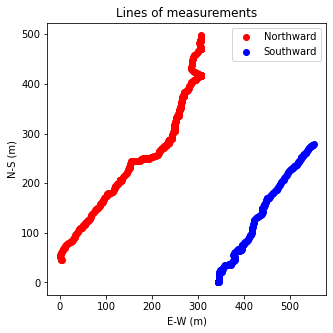

In [5]:
# Plot the geometry of the measurement path
plt.figure(figsize=(5,5))
# Plot a top down map of lines, flattened to x/y geometry.
plt.scatter(xd1, yd1, color='r',  label = 'Northward')
plt.scatter(xd2, yd2, color='b',  label = 'Southward')
plt.legend()
plt.title('Lines of measurements')
plt.xlabel('E-W (m)')
plt.ylabel('N-S (m)')


Text(0, 0.5, 'Magnetic Field (nT)')

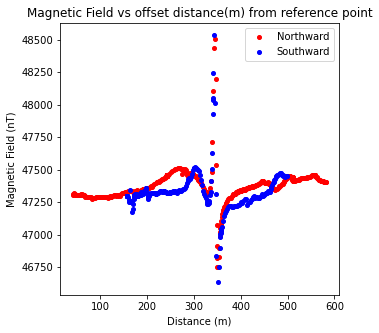

In [6]:
plt.figure(figsize=(5,5))

plt.plot(dist1,B1,'r.',MarkerSize=8, label = 'Northward')
plt.plot(dist2,B2,'b.',MarkerSize=8, label = 'Southward')
plt.legend()

# Plot B field along lines projected along normal to fault.
plt.title('Magnetic Field vs offset distance(m) from reference point')
plt.xlabel('Distance (m)')
plt.ylabel('Magnetic Field (nT)')

## 3. Build 3 models:

#### 3.1 Dipole Model (Telford 3.37a)
![3.37](./3.37.png)
#### 3.2 Vertical Sheet Model (Line of poles, Telford 3.40b)
![3.40](./3.40.png)
#### 3.3 Ribbon Model (Line of dipoles, Telford 3.41c)
![3.41](./3.41.png)

-------
The following figure shows the geometry information of isolated dipole. You can learn more about $I, \theta, \phi$ from this figure.

![Geometry](./Geometry.png)


The following figure shows the geometry of $\beta$, which is the strike angle of the fault West of magnetic North.

![Geometry](./G2.png)

_______

Please __finish the functions of 3 models__: a dipole model (Telford 3.37a), a vertical sheet (Telford 3.40b), and a ribbon model (Telford 3.41c). You can then use curvefit function to find best parameters for 3 models with provided dataset. Please compare the misfit between models and data with SSQ/n (Sum of Squares) and find the best one among these 3 models.
_______

The best model is: `Remove to fill your answer`


-----

To start the inversion, you will need to select starting values for your model parameters which are close enough to the data that the model inversion converges. The code is written such that you will need to set your five starting model parameters in the vector p0. 

You should be able to guess reasonable starting values for p0. Enter your values in the vector p0 and run the code again. To see how well your starting model fits the data, calculate the SSQ/n where $ SSQ = (data-model)*(data-model) $ and $ n = number \ of \ data \ points $. If you are not satisfied with the fit, change the values in p0, and run the script again. 

A pole intensity is similar to the drho that were used for the gravity anomaly calculations. The ssq stand for sum of squares, and the value assigned to it is the sum of the squares of your model misfit, and changes each time you run curve_fit() and modify your parameters. 




In [7]:
def Dipole(x, xoffset, depth, itensity, yshift):
    '''
    Dipole
    inputs:
    x                 ==  distance (m)
    p[0] == xoffset   ==  X offset from reference (m)
    p[1] == depth     ==  depth (m)
    p[2] == intensity ==  pole intensity per unit length
    p[3] == yshift    ==  magnetic shift (Y axis)
    output:
    B                 ==  magnetic field in nT
    '''
    
    # The inclination around LA area is rougly 59 degree
    I = 59 / 180 * np.pi
    ???
    return ???

Dipole misfit: 12385.2587593
Xoffset: 341.032075385 Depth: 3.92615095101 Intensity: -40.4115190706 Yshift: 47367.3917899


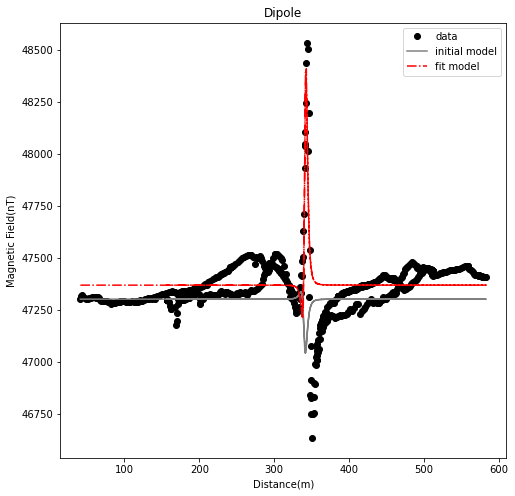

In [9]:
# Dipole 

# Set start parameter array p0 using realistic estimates. 
p0 = [340, 5, 20, 47300]       

#Use curve_fit to invert for best fit p_fit.
xdata = dist
ydata = B
popt_dp, pcov_dp = curve_fit(Dipole, xdata, ydata , p0=p0)

# Evaluate model magnetic field at each point using inverted paramters in p.

plt.figure(figsize=(8,8)) 
# Plot data, initial model, and fitted model.
plt.plot(dist, B,'ko', label = 'data')
plt.plot(dist, Dipole(xdata, *p0), 'gray', label='initial model' )
plt.plot(dist, Dipole(xdata, *popt_dp), 'r-.', label='fit model')           
plt.title('Dipole')
plt.legend()
plt.xlabel('Distance(m)')
plt.ylabel('Magnetic Field(nT)')

# display SSQ/n (Sum of Squares) misfit
print('Dipole misfit:', sum((B-Dipole(xdata, *popt_dp))**2)/len(B))
print('Xoffset:', popt_dp[0],'Depth:', popt_dp[1], 'Intensity:', popt_dp[2], 'Yshift:', popt_dp[3])


In [24]:
def VerticalSheet(x, xoffset, depth, itensity, yshift, beta):
    
    '''
    Vertical magnetic dipole sheet perturbation
    
    inputs:
    x                 ==  distance (m)
    p[0] == xoffset   ==  X offset from reference (m)
    p[1] == depth     ==  depth (m)
    p[2] == intensity ==  pole intensity per unit length
    p[3] == yshift    ==  magnetic shift (Y axis)
    p[4] == beta      ==  fault rotation angle
    output:
    B                 ==  magnetic field in nT
    '''
    # The inclination around LA area is rougly 59 degree
    I = 59 / 180 * np.pi
    ???
    return ???


VerticalDipoleSheet misfit: 9102.23455498
Xoffset: 344.342042597 Depth: 1.653740988 Intensity: 1.30946059953 Yshift: 47366.2178712 Beta: 1.56455145381


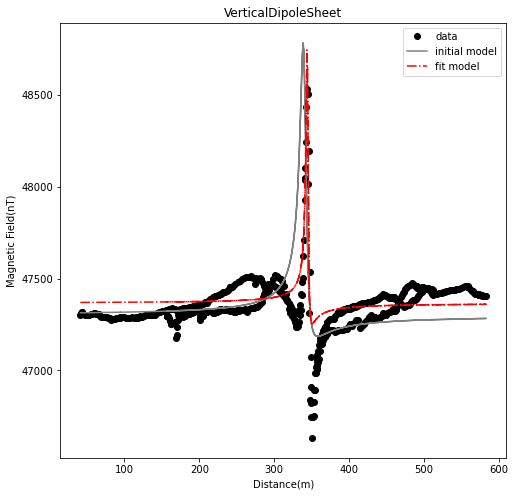

In [25]:
# VerticalSheet

# Set start parameter array p0 using realistic estimates. 
p0=[340, 5, 4, 47300, np.pi/2]       

#Use curve_fit to invert for best fit p_fit.
xdata = dist
ydata = B
popt_vs, pcov_vs = curve_fit(VerticalSheet, xdata, ydata , p0=p0)

# Evaluate model magnetic field at each point using inverted paramters in p.

plt.figure(figsize=(8,8)) 
# Plot data, initial model, and fitted model.
plt.plot(dist, B,'ko', label = 'data')
plt.plot(dist, VerticalSheet(xdata, *p0), 'gray', label='initial model' )
plt.plot(dist, VerticalSheet(xdata, *popt_vs), 'r-.', label='fit model')           
plt.title('VerticalDipoleSheet')
plt.legend()
plt.xlabel('Distance(m)')
plt.ylabel('Magnetic Field(nT)')

# display SSQ/n (Sum of Squares) misfit
print('VerticalDipoleSheet misfit:', sum((B-VerticalSheet(xdata, *popt_vs))**2)/len(B))

print('Xoffset:', popt_vs[0],'Depth:', popt_vs[1], 'Intensity:', popt_vs[2], 'Yshift:', popt_vs[3], 'Beta:', popt_vs[4]%(2*np.pi))


In [28]:
def Ribbon(x, xoffset, depth, itensity, yshift, beta):
    
    '''
    line of dipoles (Ribbon)
    inputs:
    x                 ==  distance (m)
    p[0] == xoffset   ==  X offset from reference (m)
    p[1] == depth     ==  depth (m)
    p[2] == intensity ==  pole intensity per unit length
    p[3] == yshift    ==  magnetic shift (Y axis)
    p[4] == beta      ==  fault rotation angle
    output:
    B                 ==  magnetic field in nT
    '''
    # The inclination around LA area is rougly 59 degree
    I = 59 / 180 * np.pi
    ???
    return ???

Ribbon misfit: 5030.27326146
Xoffset: 345.818506198 Depth: 5.39522407826 Intensity: 21.2808922365 Yshift: 47377.7222099 Beta: 1.21136981856


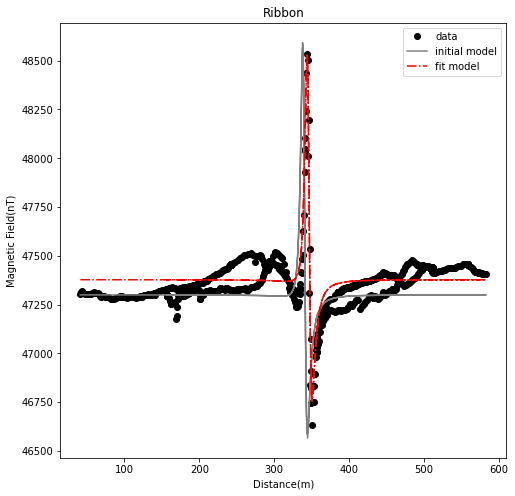

In [30]:
# Ribbon

# Set start parameter array p0 using realistic estimates. 
p0=[340, 5, 20, 47300, np.pi/2]       

#Use curve_fit to invert for best fit p_fit.
xdata = dist
ydata = B
popt_rb, pcov_rb = curve_fit(Ribbon, xdata, ydata , p0=p0)

# Evaluate model magnetic field at each point using inverted paramters in p.

plt.figure(figsize=(8,8)) 
# Plot data, initial model, and fitted model.
plt.plot(dist, B, 'ko', label = 'data')
plt.plot(dist, Ribbon(xdata, *p0), 'gray', label='initial model' )
plt.plot(dist, Ribbon(xdata, *popt_rb), 'r-.', label='fit model')           
plt.title('Ribbon')
plt.legend()
plt.xlabel('Distance(m)')
plt.ylabel('Magnetic Field(nT)')

# display SSQ/n (Sum of Squares) misfit
print('Ribbon misfit:', sum((B-Ribbon(xdata, *popt_rb))**2)/len(B))
print('Xoffset:', popt_rb[0],'Depth:', popt_rb[1], 'Intensity:', popt_rb[2], 'Yshift:', popt_rb[3], 'Beta:', popt_rb[4]%(2*np.pi))


## 3. Remove pipes' effect (Open-Ended)

If you finish previous steps above, you will get most of the credits for lab 5. However, what you have done is not correct. The sharp pipes we see from the plot are not the real magnetic signals from the fault. Unfortunately, there are some unseen metal pipes somewhere underneath that area. You were actually trying to fit the magnetic signals from pipes.

How can we remove the effects of the pipes? We may assume your previous best model already catch the magnetic anomaly contribution from metal pipes. Use original data minus this best fitted model would give us the magnetic anomaly from San Andreas Fault.


Implement:

1) Clean the data by removing the influence from the pipes. 

2) Try to use one of 3 models to fit the “clean” part. 

3) Determine if this is good enough. If not, repeat 1 and 2.

Misfit: 3891.5148332
Xoffset: 308.93028236 Depth: 38.4070588299 Intensity: 111.085698318 Yshift: -0.293930441174 Beta: 1.69404327517


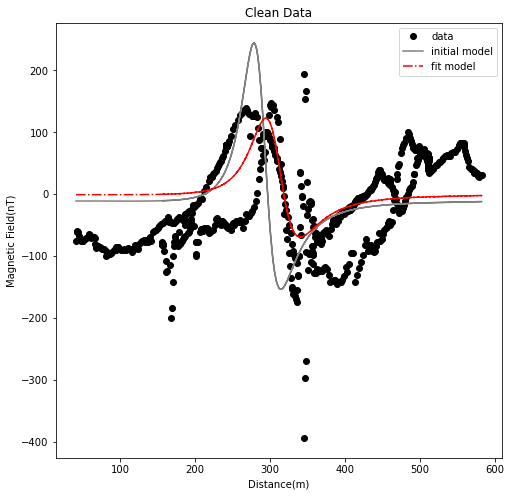

In [45]:
# Here is an example

# Clean the data by removing the influence from the pipes
# For example, clean_data = ydata - Ribbon(xdata, *popt_rb)
clean_data = ydata - ???(xdata, *???)

p1 = [290, 30, 140, -10, np.pi/2]

# Use curve_fit to invert for best fit p_fit. Please select the model you want to test
popt1, pcov1 = curve_fit(???, xdata, clean_data , p0=p1)

# Evaluate model magnetic field at each point using inverted paramters in p.
plt.figure(figsize=(8,8)) 
# Plot data, initial model, and fitted model.
plt.plot(xdata, clean_data, 'ko', label = 'data')
plt.plot(xdata, ???(xdata, *p1), 'gray', label='initial model' )
plt.plot(xdata, ???(xdata, *popt1), 'r-.', label='fit model')           
plt.title('Clean Data')
plt.legend()
plt.xlabel('Distance(m)')
plt.ylabel('Magnetic Field(nT)')

# display SSQ/n (Sum of Squares) misfit
print('Misfit:', sum((clean_data - ???(xdata, *popt1))**2)/len(B))

print('Xoffset:', popt1[0],'Depth:', popt1[1], 'Intensity:', popt1[2], 'Yshift:', popt1[3], 'Beta:', popt1[4]%(2*np.pi))


#### Questions

1) Which model do you think fit the pipes best? What's SSQ/n ?

2) Which model is best for the cleaned data (San Andreas Fault)? What's SSQ/n ?

3) What can you infer from this result ? For example, where is the fault?

------------

Your Answer:

1) Fill here

2) Fill here

3) Fill here

____________
